<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Quality Control</h1>
<br>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Introduction</h1>

- Once we have our expression matrix, it should be examined to remove poor quality cells which were not detected in the initial processing of the raw reads. Failure to remove low quality cells at this stage may add technical noise which has the potential to obscure the biological signals of interest in the downstream analysis.

- To perform QC we will be looking for cells which are outliers with respect to the rest of the dataset rather than comparing to independent quality standards. Consequently, care should be taken when comparing quality metrics across datasets collected using different protocols.

### Installations

In [2]:
!pip install -q scanpy

import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

### Loading the data

In [3]:
adata = sc.read('../input/theory-introto-singlecell-rnaseq-images/brain_raw/brain_raw.h5ad')

In [4]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [5]:
adata.var.head()

,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Computing quality control metrics</h2>
We'll compute quality metrics and then filter cells and genes accordingly.

The calculate_qc_metrics function returns two dataframes: one containing quality control metrics about cells, and one containing metrics about genes. This function is housed in the 'preprocessing' portion of the SCANPY library.

calculate_qc_metrics when ['ERCC'] is inserted, it returns the information of both cells and genes with respect to Spike-ins.

In [6]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
cell_qc_dataframe.head()

This is the cell quality control dataframe:


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC
cell,,,,,,,,,,,
A1.B003290.3_38_F.1.1,3359,8.119696,390075.0,12.874097,25.884766,32.847017,42.219573,59.472666,10201.0,9.230339,2.615138
A1.B003728.3_56_F.1.1,1718,7.449498,776439.0,13.562474,43.051933,52.912721,65.313309,87.315423,67351.0,11.117688,8.674345
A1.MAA000560.3_10_M.1.1,3910,8.271548,1616087.0,14.295519,44.066006,51.514553,60.164211,74.451190,29870.0,10.304644,1.848292
A1.MAA000564.3_10_M.1.1,4352,8.378621,360004.0,12.793873,41.650926,48.958623,56.997422,69.736170,2592.0,7.860571,0.719992
A1.MAA000923.3_9_M.1.1,2248,7.718241,290282.0,12.578611,63.392494,69.136908,77.168753,90.522320,11002.0,9.305923,3.790107


- “total_genes_by_counts”. Number of genes with positive counts in a cell. (total gene count having True ERCC)
- “total_counts”. Total number of counts for a cell.
- “pct_counts_in_top_50_genes”. Cumulative percentage of counts for 50 most expressed genes in a cell.
- “total_counts_mito”. Total number of counts for variabes in qc_vars.
- “pct_counts_mito”. Proportion of total counts for a cell which are mitochondrial.
- “total_counts”. Sum of counts for a gene.
- “n_genes_by_counts”. The number of genes with at least 1 count in a cell. Calculated for all cells.
- “mean_counts”. Mean expression over all cells.
- “n_cells_by_counts”. Number of cells this expression is measured in.
- “pct_dropout_by_counts”. Percentage of cells this feature does not appear in.

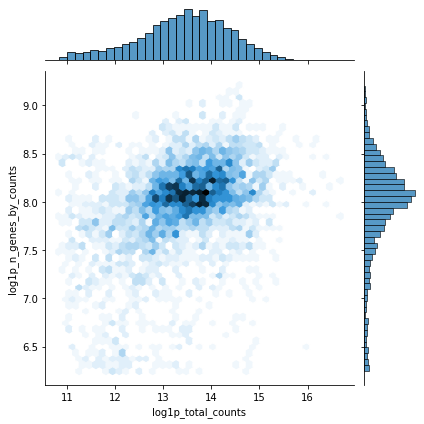

In [7]:
import seaborn as sns
sns.jointplot(
    data=cell_qc_dataframe,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

Plot between **log1p_n_genes_by_counts** (log(1+x) where x is count of genes in a cell which are ERCC) and **log1p_total_counts** (log(1+x) where x is total count of genes in a cell)

Plots a bivariate histogram using hexagonal bins with marginal histograms.

<AxesSubplot:xlabel='pct_counts_ERCC', ylabel='Count'>

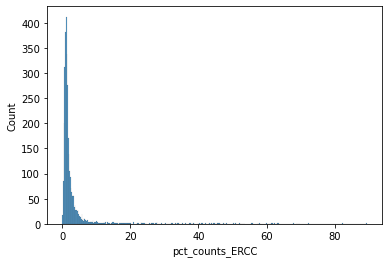

In [8]:
sns.histplot(cell_qc_dataframe["pct_counts_ERCC"])

Gives the histogram for **pct_counts_ERCC** - %genes in the cell which are ERCC

In [9]:
print('This is the gene quality control dataframe:')
gene_qc_dataframe.head()

This is the gene quality control dataframe:


,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402.0,5.998937
0610007C21Rik,2399,206.211990,5.333742,29.461923,701327.0,13.460731
0610007L01Rik,961,35.938549,3.609256,71.743605,122227.0,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101.0,10.003424
0610007P08Rik,582,16.328728,2.852366,82.887386,55534.0,10.924768


<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Quality Control for Cells</h2>

## Library size 
First, we consider the total number of reads detected per cell. Cells with few reads are likely to have been broken or failed to capture a cell, and should thus be removed.

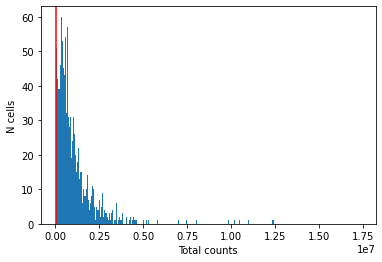

In [10]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')

Looks like the authors have already removed cells with fewer than 50,000 reads.

## Detected genes 
In addition to ensuring sufficient sequencing depth for each sample, we also want to make sure that the reads are distributed across the transcriptome. Thus, we count the total number of unique genes detected in each sample.

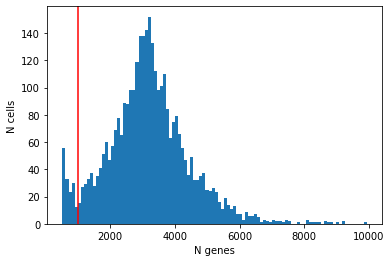

In [11]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

From the plot we conclude that most cells have between ~1,000-5,000 detected genes, which is typical for smartseq2 data. However, this varies by experimental protocol and sequencing depth.

The most notable feature in the above plot is the <b>little peak on the left hand side </b>of the distribution. If detection rates were equal across the cells then the distribution should be approximately normal. Thus, we will remove those cells in the tail of the distribution (fewer than ~1000 detected genes).

## Spike-ins 
- Another measure of cell quality is the ratio between ERCC spike-in RNAs and endogenous RNAs. This ratio can be used to estimate the total amount of RNA in the captured cells. 
- **Cells with a high level of spike-in RNAs had low starting amounts of RNA, likely due to the cell being dead or stressed which may result in the RNA being degraded.**

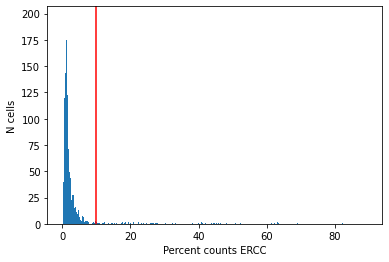

In [12]:
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color='red')

Placing a threshold is always a judgement call. Here, the majority of cells have less than 10% ERCC counts, but there's a <b>long tail of cells that have very high spike-in counts; these are likely dead cells and should be removed.</b>

## Cell Filtering based on above analysis
There isn't an automatic function for removing cells with a high percentage of ERCC reads, but we can use a mask to remove them like so:
- Removing cells having ERCC percentage count >= 10
- Removing cell having gene count < 750

In [13]:
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
adata = adata[low_ERCC_mask]

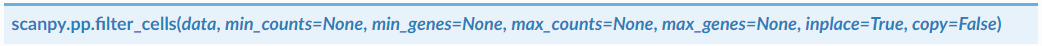

In [14]:
# Filter cells with fewer 750 genes detected.
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 750)
print('Finished with: \n', adata)

Started with: 
 View of AnnData object with n_obs × n_vars = 3218 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'


Trying to set attribute `.obs` of view, copying.


Finished with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'


<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Quality Control for Genes</h2>

It is typically a good idea to remove genes whose expression level is considered "undetectable". 
- We define a <b>gene as detectable if at least two cells contain more than 5 reads from the gene. </b> However, the threshold strongly depends on the sequencing depth. 
- It is important to keep in mind that <b> genes must be filtered after cell filtering </b> since some genes may only be detected in poor quality cells.

First, we consider the total number of cell in which a gene is deteted. Genes with few cell count are outliers and should thus be removed.

In [16]:
gene_qc_dataframe.head()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402.0,5.998937
0610007C21Rik,2399,206.211990,5.333742,29.461923,701327.0,13.460731
0610007L01Rik,961,35.938549,3.609256,71.743605,122227.0,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101.0,10.003424
0610007P08Rik,582,16.328728,2.852366,82.887386,55534.0,10.924768


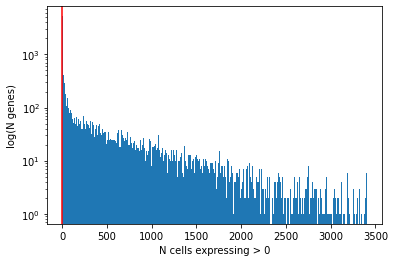

In [15]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 

There is no gene which is having n_cells_by_counts < 2

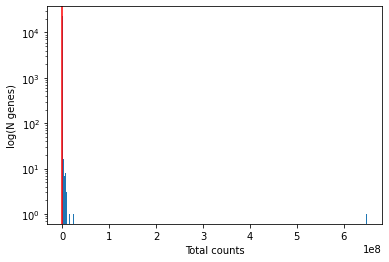

In [17]:
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
plt.axvline(10, color='red')

There is no gene which is having sum_counts < 10

In [18]:
print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2)
sc.pp.filter_genes(adata, min_counts = 10)
print('Finished with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'
Finished with: 
 AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


No genes are removed.

# Saving the Quality Controlled adata

In [19]:
print(adata) ## Final dimensions of the QC'd dataset
adata.write('brain_qc.h5ad')

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


In [20]:
!zip "brain_qc.zip" "./brain_qc.h5ad"

  adding: brain_qc.h5ad (deflated 88%)


<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Summary</h2>

- We calculated the quality control metrices across cells and genes.
- We did quality control in cells by removing cells with less total gene count, less unique genes and gaving more spike-ins.
- We did quality control in genes by removing genes which occur in less unique cells as well as those genes having less total cells.
- Saving the quality controlled data for further pipeline.

https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/01-basic-qc.html